# Betting strategies 
## _England Premiere League Results & Odds Dataset_

### I. Introduction

> You do not know anything about sports betting or you want to implement a new strategy? This notebook will help you understand this world, and also provide you a **betting strategy** that you will be able to apply on your own.

In this report, we will take the example of Football, the sport with the highest number of bets. More precisely, we will concentrate on **England Premiere League results**, because its great number of matches will allow us to test and build a strong strategy. 

##### Explanations on betting's vocabulary
First, let's set up the vocabulary. While betting,  _odds_ are linked to each bet you make. Betting odds tell you how likely an event is to happen, and represents how much money you could win if your bet realizes itself.
There is the possibility to bet on different type of results before a match. Here, we will take into account these type of bets: the one on the number of goals, the other on the match result (Home team wins, Away team wins, Draw match).


#### First, we imported some extensions that will be useful for this notebook. As you can see we imported :

> 1. numpy (...)
> 2. matplotlib (...)
> 3. pandas (...)
> 5. seaborn (...)
> 6. sklearn (...)

In [55]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections  as mc
%load_ext autoreload
%autoreload 2
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
sns.set_style("white")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Dataset

The dataset we chose groups the results of these matches since 2008 with data like date time, Home team/Away team, the goals, the match result, the referee for the match etc. There are also odds set on matches' results or number of goals, taken from different betting sites.

The following is the dataset, in a csv file, that we decided to call _data_.

In [56]:
data = pd.read_csv('https://raw.githubusercontent.com/abdul232/DMML_Team_Rolex/master/data/Premier%20League%202018%20-%202019.csv', sep=';')
# view the first 10 rows 
data.head(10)

,Match_ID,Date,HomeTeam,AwayTeam,Home Team Goals,Away Team Goals,Match Result,Referee,Home Team Shots,Away Team Shots,...,Betbrain Average Home,Betbrain Maximum Draw,Betbrain Average Draw,Betbrain Maximum Away,Betbrain Average Away,Betbrain Numbers of bookmakers Goals,Betbrain Max > 2.5 Goals,Betbrain Average > 2.5 Goals,Betbrain Max < 2.5 Goals,Betbrain Average < 2.5 Goals
0,3801,10.08.2018,Man United,Leicester,2,1,H,A Marriner,8,13,...,1.56,4.20,3.92,8.05,7.06,38,2.12,2.03,1.85,1.79
1,3802,11.08.2018,Bournemouth,Cardiff,2,0,H,K Friend,12,10,...,1.88,3.71,3.53,4.75,4.37,38,2.05,1.98,1.92,1.83
2,3803,11.08.2018,Fulham,Crystal Palace,0,2,A,M Dean,15,10,...,2.47,3.49,3.35,3.05,2.92,38,2.00,1.95,1.96,1.87
3,3804,11.08.2018,Huddersfield,Chelsea,0,3,A,C Kavanagh,6,13,...,6.09,4.07,3.90,1.66,1.61,37,2.05,1.98,1.90,1.84
4,3805,11.08.2018,Newcastle,Tottenham,1,2,A,M Atkinson,15,15,...,3.83,3.57,3.40,2.12,2.05,38,2.10,2.01,1.88,1.81
5,3806,11.08.2018,Watford,Brighton,2,0,H,J Moss,19,6,...,2.36,3.30,3.14,3.42,3.31,37,2.46,2.35,1.67,1.59
6,3807,11.08.2018,Wolves,Everton,2,2,D,C Pawson,11,6,...,2.33,3.40,3.27,3.40,3.23,36,2.20,2.09,1.83,1.75
7,3808,12.08.2018,Arsenal,Man City,0,2,A,M Oliver,9,17,...,3.83,4.00,3.80,2.00,1.92,36,1.60,1.55,2.55,2.42
8,3809,12.08.2018,Liverpool,West Ham,4,0,H,A Taylor,18,5,...,1.25,6.79,6.22,15.00,12.30,33,1.49,1.44,2.88,2.72
9,3810,12.08.2018,Southampton,Burnley,0,0,D,G Scott,18,16,...,1.84,3.61,3.43,5.20,4.80,37,2.45,2.34,1.67,1.60


In [57]:
data.shape

(380, 47)

In [58]:
#We have to drop the two lasts rows because they are NaN
#data = data.drop([4180, 4181])

#We have a new dimension
#data.shape

This dataset without the _NaN counts_ **4'182** rows for **47** columns.

Now, let's set up the **types of the variables**. We will change some as int (integer), the date as datetime, while other will remain objects.

In [59]:
data.dtypes

Match_ID                                  int64
Date                                     object
HomeTeam                                 object
AwayTeam                                 object
Home Team Goals                           int64
Away Team Goals                           int64
Match Result                             object
Referee                                  object
Home Team Shots                           int64
Away Team Shots                           int64
Home Team Shots on Target                 int64
Away Team Shots on Target                 int64
Home Fouls Committed                      int64
Away Fouls Committed                      int64
Home Corners                              int64
Away Cornners                             int64
Home Yellow Cards                         int64
Away Yellow Cards                         int64
Home Red Cards                            int64
Away Red Cards                            int64
B365 Home                               

In [60]:
#We have to change the type of some variable
data['Match_ID'] = data.Match_ID.astype(int)


In [61]:
#We have to change the type of some variable
data['Date'] = pd.to_datetime(data['Date'], format="%d.%m.%Y")

In [62]:
#We have to change the type of some variable
data[['Home Team Goals', 'Away Team Goals', 'Home Team Shots','Away Team Shots', 'Home Team Shots on Target', 'Away Team Shots on Target', 'Home Fouls Committed', 'Away Fouls Committed', 'Home Corners', 'Away Cornners', 'Home Yellow Cards', 'Away Yellow Cards', 'Home Red Cards', 'Away Red Cards']]= data[['Home Team Goals', 'Away Team Goals', 'Home Team Shots','Away Team Shots', 'Home Team Shots on Target', 'Away Team Shots on Target', 'Home Fouls Committed', 'Away Fouls Committed', 'Home Corners', 'Away Cornners', 'Home Yellow Cards', 'Away Yellow Cards', 'Home Red Cards', 'Away Red Cards']].astype(int)

In [63]:
data.dtypes

Match_ID                                         int64
Date                                    datetime64[ns]
HomeTeam                                        object
AwayTeam                                        object
Home Team Goals                                  int64
Away Team Goals                                  int64
Match Result                                    object
Referee                                         object
Home Team Shots                                  int64
Away Team Shots                                  int64
Home Team Shots on Target                        int64
Away Team Shots on Target                        int64
Home Fouls Committed                             int64
Away Fouls Committed                             int64
Home Corners                                     int64
Away Cornners                                    int64
Home Yellow Cards                                int64
Away Yellow Cards                                int64
Home Red C

# Regressions

To build a betting strategy, it is first relevant to know how frequently the betting companies makes right predicting or not. So, in order to undertand this fact, we will build three different scatter plot :
> * when the official result is the victory of the home team crossed with the "Home team win" odd.
> * When the official result is the victory of the away team crossed with the match result with the "Away team win" odd.
> * When the official result is draw crossed with the "Draw"odd.

Each graph will show the odds of all the betting websites, to compare them.

#### Normalistion
As first steps we will normalise the odds to have a better comparison :

In [64]:
#We would like to do 3 different regression, one for the Home team wins, one for the draws and one for the Away team wins
data = pd.get_dummies(data, columns=['Match Result'])


In [65]:
from sklearn import preprocessing
# separate the data from the target attributes
#X = data['B365 Home','B365 Draw','B365 Away','Bet&Win Home','Bet&Win Draw','Bet&Win Away','Interwetten Home','Iterwetten Draw','Interwetten Away','William Hill Home','William Hill Draw','William Hill Away','VC Bet Home','VC Bet Draw','VC Bet Away']
# normalisation par formule (x - x.min()) / (x.max() - x.min())
cols_to_norm = ['B365 Home','B365 Draw','B365 Away','Bet&Win Home','Bet&Win Draw','Bet&Win Away','Interwetten Home','Iterwetten Draw','Interwetten Away','William Hill Home','William Hill Draw','William Hill Away','VC Bet Home','VC Bet Draw','VC Bet Away']
data[cols_to_norm] = data[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min())) 
data[cols_to_norm].head(10)

,B365 Home,B365 Draw,B365 Away,Bet&Win Home,Bet&Win Draw,Bet&Win Away,Interwetten Home,Iterwetten Draw,Interwetten Away,William Hill Home,William Hill Draw,William Hill Away,VC Bet Home,VC Bet Draw,VC Bet Away
0,0.023245,0.064286,0.159980,0.024060,0.090909,0.182679,0.025357,0.093923,0.210904,0.026065,0.080,0.108734,0.023690,0.083333,0.117529
1,0.038286,0.042857,0.084754,0.042607,0.036364,0.093777,0.043846,0.060773,0.106887,0.043108,0.050,0.064171,0.037358,0.050000,0.072403
2,0.065634,0.028571,0.047141,0.070175,0.027273,0.052194,0.070259,0.038674,0.065638,0.070175,0.030,0.037433,0.066059,0.033333,0.037304
3,0.247949,0.071429,0.012287,0.260652,0.081818,0.012618,0.270998,0.116022,0.015423,0.238095,0.090,0.010027,0.248292,0.083333,0.009627
4,0.129444,0.035714,0.023069,0.137845,0.045455,0.024950,0.138933,0.044199,0.033357,0.137845,0.020,0.020722,0.129841,0.033333,0.019254
5,0.059708,0.014286,0.057172,0.065163,0.009091,0.062231,0.059694,0.038674,0.081779,0.066667,0.000,0.048574,0.061503,0.016667,0.045327
6,0.059708,0.021429,0.054664,0.065163,0.018182,0.059363,0.062335,0.044199,0.074605,0.062657,0.020,0.046346,0.060592,0.025000,0.043321
7,0.134002,0.057143,0.020812,0.132832,0.068182,0.023516,0.133650,0.071823,0.031564,0.137845,0.080,0.017602,0.129841,0.083333,0.015443
8,0.008660,0.250000,0.322969,0.007519,0.340909,0.369085,0.009509,0.348066,0.354376,0.010025,0.250,0.242424,0.009112,0.291667,0.237866
9,0.036007,0.035714,0.097292,0.037594,0.045455,0.103814,0.038563,0.071823,0.121234,0.039098,0.025,0.081996,0.036446,0.033333,0.081428


In [66]:
round(data[cols_to_norm],3).head(10)

,B365 Home,B365 Draw,B365 Away,Bet&Win Home,Bet&Win Draw,Bet&Win Away,Interwetten Home,Iterwetten Draw,Interwetten Away,William Hill Home,William Hill Draw,William Hill Away,VC Bet Home,VC Bet Draw,VC Bet Away
0,0.023,0.064,0.160,0.024,0.091,0.183,0.025,0.094,0.211,0.026,0.080,0.109,0.024,0.083,0.118
1,0.038,0.043,0.085,0.043,0.036,0.094,0.044,0.061,0.107,0.043,0.050,0.064,0.037,0.050,0.072
2,0.066,0.029,0.047,0.070,0.027,0.052,0.070,0.039,0.066,0.070,0.030,0.037,0.066,0.033,0.037
3,0.248,0.071,0.012,0.261,0.082,0.013,0.271,0.116,0.015,0.238,0.090,0.010,0.248,0.083,0.010
4,0.129,0.036,0.023,0.138,0.045,0.025,0.139,0.044,0.033,0.138,0.020,0.021,0.130,0.033,0.019
5,0.060,0.014,0.057,0.065,0.009,0.062,0.060,0.039,0.082,0.067,0.000,0.049,0.062,0.017,0.045
6,0.060,0.021,0.055,0.065,0.018,0.059,0.062,0.044,0.075,0.063,0.020,0.046,0.061,0.025,0.043
7,0.134,0.057,0.021,0.133,0.068,0.024,0.134,0.072,0.032,0.138,0.080,0.018,0.130,0.083,0.015
8,0.009,0.250,0.323,0.008,0.341,0.369,0.010,0.348,0.354,0.010,0.250,0.242,0.009,0.292,0.238
9,0.036,0.036,0.097,0.038,0.045,0.104,0.039,0.072,0.121,0.039,0.025,0.082,0.036,0.033,0.081


# Plot with seaborn

Then we build a first scatter plot, we used seaborn and the betting website B365, when the Home team wins :

[Text(0, 0.5, 'Home team won [1]'),
 Text(0.5, 0, 'Website Odd while Home Team wins')]

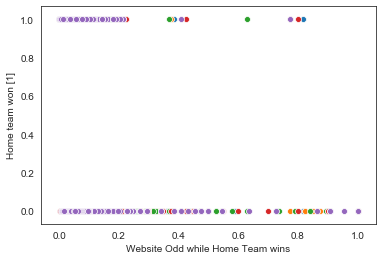

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


#tips = sns.load_dataset(data)

a_B365_Home = sns.scatterplot(x="B365 Home", y="Match Result_H", data=data)

a_BetWin_Home = sns.scatterplot(x="Bet&Win Home", y="Match Result_H", data=data)

a_Interwetten_Home = sns.scatterplot(x="Interwetten Home", y="Match Result_H", data=data)

a_WilliamHill_Home = sns.scatterplot(x="William Hill Home", y="Match Result_H", data=data)

a_VCBet_Home = sns.scatterplot(x="VC Bet Home", y="Match Result_H", data=data)

a_VCBet_Home.set(xlabel='Website Odd while Home Team wins', ylabel='Home team won [1]')

[Text(0, 0.5, 'Away team won [1]'),
 Text(0.5, 0, 'Website Odd while Away Team wins')]

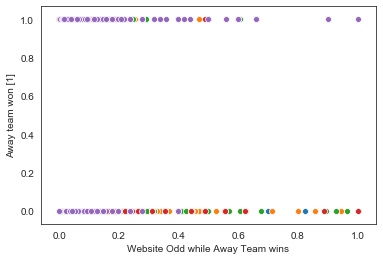

In [68]:
a_B365_Away = sns.scatterplot(x="B365 Away", y="Match Result_A", data=data)

a_BetWin_Away = sns.scatterplot(x="Bet&Win Away", y="Match Result_A", data=data)

a_Interwetten_Away = sns.scatterplot(x="Interwetten Away", y="Match Result_A", data=data)

a_WilliamHill_Away = sns.scatterplot(x="William Hill Away", y="Match Result_A", data=data)

a_VCBet_Away = sns.scatterplot(x="VC Bet Away", y="Match Result_H", data=data)

a_VCBet_Away.set(xlabel='Website Odd while Away Team wins', ylabel='Away team won [1]')

[Text(0, 0.5, 'Draw [1]'), Text(0.5, 0, 'Website Odd while Draw match')]

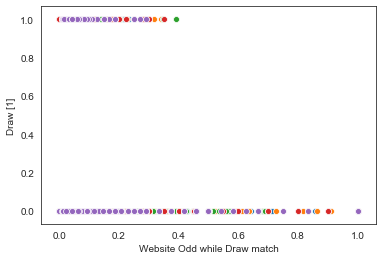

In [69]:
a_B365_Draw = sns.scatterplot(x="B365 Draw", y="Match Result_D", data=data)

a_BetWin_Draw = sns.scatterplot(x="Bet&Win Draw", y="Match Result_D", data=data)

a_Interwetten_Draw = sns.scatterplot(x="Iterwetten Draw", y="Match Result_D", data=data)

a_WilliamHill_Draw = sns.scatterplot(x="William Hill Draw", y="Match Result_D", data=data)

a_VCBet_Draw = sns.scatterplot(x="VC Bet Draw", y="Match Result_D", data=data)

a_VCBet_Draw.set(xlabel='Website Odd while Draw match', ylabel='Draw [1]')

[Text(0, 0.5, 'Draw [1]'), Text(0.5, 0, 'Website Odd while Draw match')]

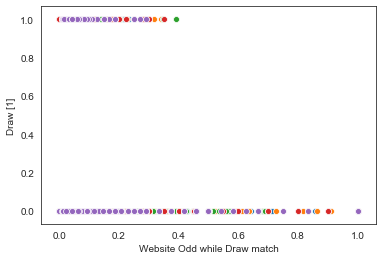

In [70]:
a_B365_Draw = sns.scatterplot(x="B365 Draw", y="Match Result_D", data=data)

a_BetWin_Draw = sns.scatterplot(x="Bet&Win Draw", y="Match Result_D", data=data)

a_Interwetten_Draw = sns.scatterplot(x="Iterwetten Draw", y="Match Result_D", data=data)

a_WilliamHill_Draw = sns.scatterplot(x="William Hill Draw", y="Match Result_D", data=data)

a_VCBet_Draw = sns.scatterplot(x="VC Bet Draw", y="Match Result_D", data=data)

a_VCBet_Draw.set(xlabel='Website Odd while Draw match', ylabel='Draw [1]')

In [71]:
#course : feature_names = ['1stFlrSF']
#X = home_data[feature_names]
#y = home_data["SalePrice"]
#X.head()

feature_names = ['B365 Home','Bet&Win Home','Interwetten Home','William Hill Away']
X = data[feature_names]
y = data["VC Bet Home"]
X.head()
y.head()

0    0.023690
1    0.037358
2    0.066059
3    0.248292
4    0.129841
Name: VC Bet Home, dtype: float64

In [50]:
#Numerical = ["B365 Home"]
#X = data[Numerical]
#X.head(5)

In [51]:
# split train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [52]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn                        import metrics, svm
from sklearn.linear_model           import LogisticRegression
from sklearn import preprocessing
from sklearn import utils

In [53]:
# We have to fix the  ValueError: Unknown label type: ‘continuous’ executing
#lab_enc = preprocessing.LabelEncoder()
#training_scores_encoded = lab_enc.fit_transform(y_train)
#print(training_scores_encoded)
#print(utils.multiclass.type_of_target(y_train))
#print(utils.multiclass.type_of_target(y_train.astype('int')))
#print(utils.multiclass.type_of_target(training_scores_encoded))

In [54]:
# Logistic regression with cross-validation
'''
parameters:
solver='lbfgs', cv=5, max_iter=380
'''
LR = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000)
LR.fit(X_train,y_train)
LR.C_

NameError: name 'training_scores_encoded' is not defined